# MLE (maximum likelihood estimates) and MAP (max posterior) for Normal Distribution

## Question 1

Read the csv file http://www.stat.ufl.edu/~winner/data/triple_vertical.csv into a data frame. The
description of this data file can be found in http://www.stat.ufl.edu/~winner/data/triple_vertical.txt .
Assume the column ‘vertical’ is distributed normally.

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib


In [2]:
vertical_df = pd.read_csv('./triple_vertical.csv')

Dataset:  triple_vertical.csv

Source: R.T. Hamilton, S.J. Schultz, R.J. Schmitz, D.H. Perrin (2008).
"Triple-Hop Distance as a Valid Predictor of Lower Limb Strength and Power,"
Journal of Athletic Training, Vol. 43, #2, pp. 144-151.

Description: Triple Hop Distance and Vertical jump height (both, in cm)
for 40 collegiate soccer players. Data simulated to match mean, sd, min, max, corr.

Variables/Labels
Triple-Hop distance in cm   (triple)
Vertical jump in cm  (vertical)

(a) Calculate MLE for $\mu$ and $\sigma^2$

In [3]:
vertical_df.head()
var = vertical_df.vertical.var()
mu = vertical_df.vertical.mean()

print "var: ", var,"mu: ", mu

var:  116.803838397 mu:  49.29975


(b) Calculate the estimated standard error for $\mu$

In [4]:
sd = vertical_df.vertical.std()
print "std deviation", sd

std deviation 10.8075824493


(c) Calculate the approximate 95% confidence interval.

In [7]:
from scipy.stats import t
print t.interval(0.95, 10, loc=mu, scale=sd)
ci = (mu - (sd  * 1.96), mu + sd  * 1.96)
print ci

(25.218955649001455, 73.380544350998548)
(28.116888399461, 70.482611600539)


In [18]:
vertical_df.vertical.describe()

count    40.000000
mean     49.299750
std      10.807582
min      33.000000
25%      40.065000
50%      48.485000
75%      58.045000
max      71.100000
Name: vertical, dtype: float64

## Question 2

- the mle | normal distribution is the mean, std otherwise argmax p(data)
- map argmax p(theta-prior|data)

Let σ = 20 and μ unknown with prior N(0,1).

(a) Sample from $\mathcal{N}(\mu, \sigma^2)$ with $\mu=10$ and with different sample sizes. For each sample calculate the
    MLE of $\mu$ (when no prior is assumed) and the MAP estimator of $\mu$ with the above prior.

In [117]:
normal_list = np.zeros((6,2))
for ix, sample_size in enumerate([10, 100, 200, 300, 400, 500]):
    distrib = (np.random.normal(loc = 10, scale = 20**2, size = sample_size))
    
    n = len(distrib)
    x_bar = distrib.mean()
    x_std = distrib.std()
    x_mean = distrib.mean()
    
    theta_map = (n / (n + x_std**2))*x_mean  + (x_std**2 / (n+x_std**2)) * 0
    print "size:", n, "mle mean" ,distrib.mean() , "map", theta_map
    
    normal_list[ix, 0] = distrib.mean()
    normal_list[ix, 1] = theta_map

size: 10 mle mean -130.792023765 map -0.00758719283012
size: 100 mle mean -27.9666498227 map -0.0172365479166
size: 200 mle mean 18.1959959068 map 0.024984698606
size: 300 mle mean -44.8408060013 map -0.0822655025713
size: 400 mle mean 16.3699427897 map 0.0423508572327
size: 500 mle mean -16.3416637509 map -0.051513012246


(b) Plot the error of the MLE and of the MAP estimator as a function of the sample size. Explain the
difference.

In [118]:
errors = abs(10 - normal_list)

Text(0.5,1,u'errors between mu and mle, map')

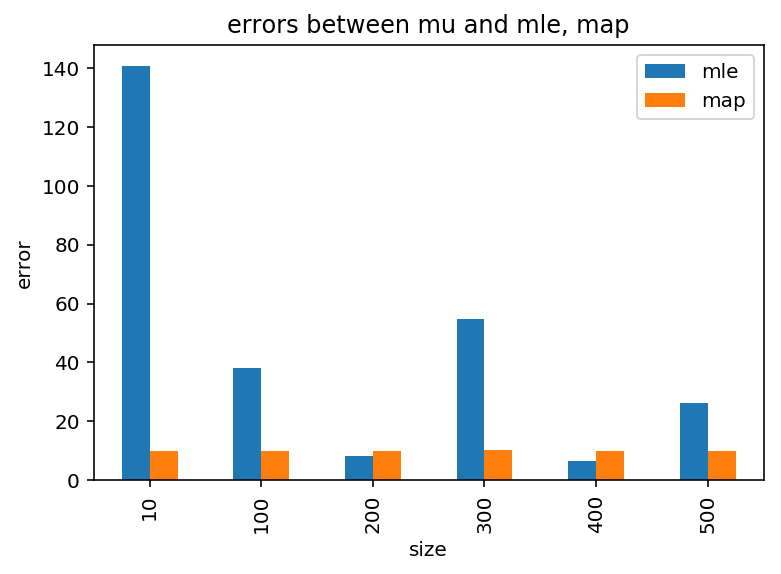

In [119]:
error_df = pd.DataFrame(errors)
error_df.columns = ["mle","map"]
error_df["size"] = np.asarray([10, 100, 200, 300, 400, 500])
error_df.set_index("size", inplace = True)
error_df.plot(kind = 'bar')
plt.ylabel("error")
plt.title("errors between mu and mle, map")

## Question 3 
(bonus)

Calculate the bias of the MLE for the mean and the variance of the normal distribution.